In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def u_z_inf(x, y, b):
    theta1 = np.arctan2(y,x-0.5)
    theta2 = np.arctan2(y,x-(-0.5))
    frac = (theta1-theta2)/(2*np.pi)
    return b*frac
  

def u_z_image(x, y, N):
    image_sum = 0
    for i in range(-N, N+1):
        for j in range(-N, N+1):
            R = [i*2, j*1]
            x_update = x-R[0]
            y_update = y-R[1]
            image_sum += u_z_inf(x_update,y_update,2)
    return image_sum


def u_z_error(x,y): 
    s_x = u_z_image(1,-0.5,10)-u_z_image(-1,-0.5,10)
    s_y = u_z_image(-1,0.5,10)-u_z_image(-1,-0.5,10)
    s = np.array([s_x, s_y])
    c_vec = np.array([(x/2)*2, y])
    err = (s[0]*c_vec[0])+(s[1]*c_vec[1])
    return err


def u_z_total(x,y):
 return u_z_image(x, y, 10) - u_z_error(x,y)
    

u_z_error(0,-0.5)

-0.3522431995059525

In [9]:
x_values = np.linspace(-1, 1, 1000)
y_values = np.linspace(-0.5, 0.5, 1000)
X, Y = np.meshgrid(x_values, y_values)
Z = u_z_image(X,Y,10)

/var/folders/x6/xldpz4l960d09s7d27px1n240000gn/T/ipykernel_7213/2506202188.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


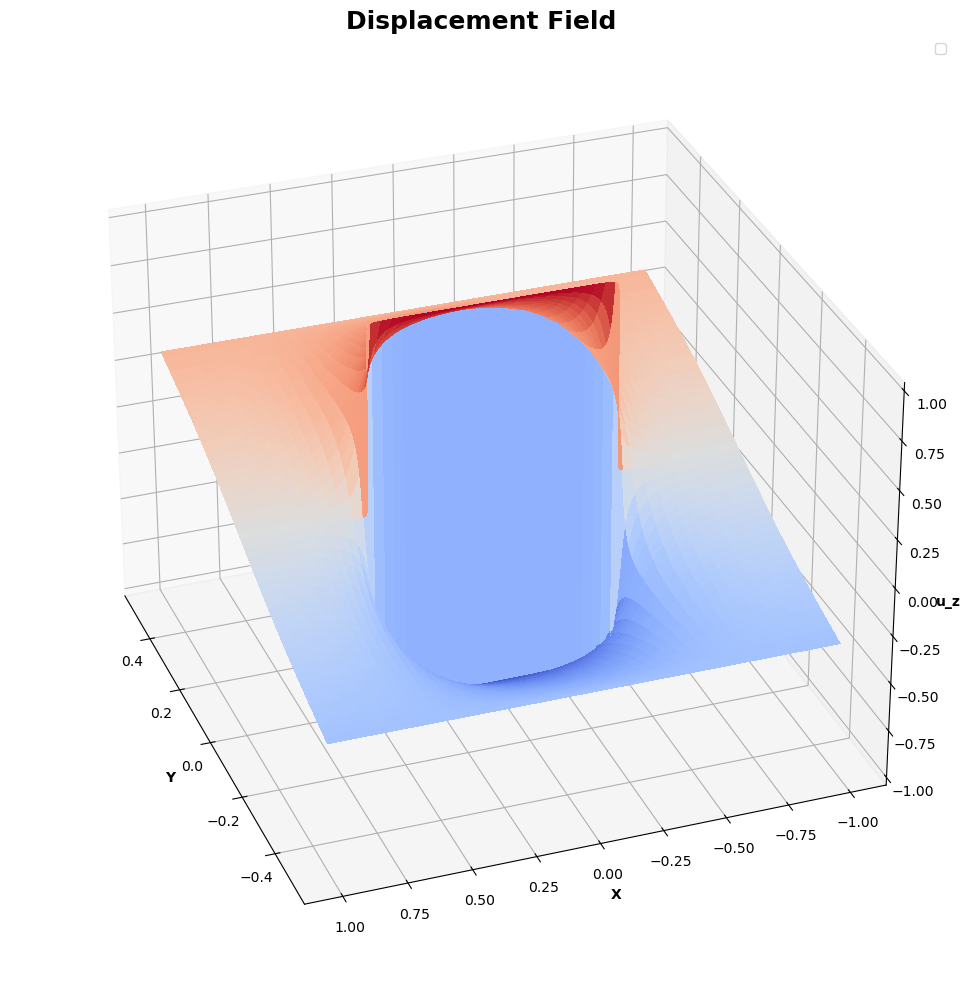

In [10]:
Z[np.logical_and(np.abs(X) < 1e-3, np.abs(Y) < 1e-3)] = np.nan

# Plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Surface plot
surf = ax.plot_surface(Y, X, Z, cmap='coolwarm', edgecolor='none', alpha=1, antialiased=False)



# View angle
ax.view_init(elev=30, azim=160)

# Labels and title
ax.set_xlabel('Y', fontsize=10, fontweight='bold')
ax.set_ylabel('X', fontsize=10, fontweight='bold')
ax.set_zlabel('u_z', labelpad=1.5, fontsize=10, fontweight='bold')
ax.set_title(r'Displacement Field', fontsize=18, fontweight='bold')

# Colorbar
#fig.colorbar(surf, shrink=0.5, aspect=10, label=r'$u_z$')

# Legend
ax.legend()

plt.tight_layout()
plt.savefig('uz_first_correction.png',dpi=600)
plt.show()

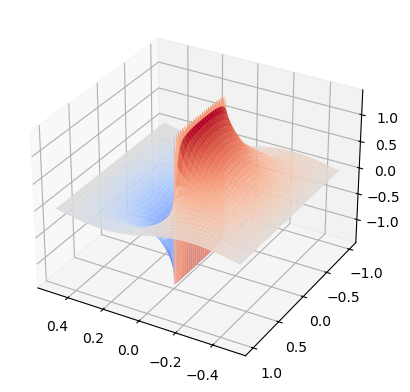

In [46]:
#### Edge dislocation displacements

def u_x (x,loc1, loc2, y, b, v):
    factor1 = b/(2*np.pi)
    theta1 = np.arctan2(y,x-loc1)
    term1 = ((x-loc1)*y)/(2*(1-v)*((x-loc1)**2+y**2))
    factor2 = -b/(2*np.pi)
    theta2 = np.arctan2(y,x-loc2)
    term2 = ((x-loc2)*y)/(2*(1-v)*((x-loc2)**2+y**2))
    return (factor1*(theta1 + term1))+(factor2*(theta2 + term2))

def u_x_image(x, y, N):
    image_sum = 0
    for i in range(-N, N+1):
        for j in range(-N, N+1):
            R = [i*2, j*1]
            x_update = x-R[0]
            y_update = y-R[1]
            image_sum += u_x(x_update,-0.5, 0.5,y_update,2.8, 0.25)
    return image_sum

def u_x_error(x,y): 
    #s_x = u_x_image(1,-0.5,10)-u_x_image(-1,-0.5,10)
    s_y = u_x_image(1,-0.5,10)-u_x_image(1,0.5,10)
    #s = np.array([s_x, s_y])
    #c_vec = np.array([(x/2)*2, y])
    #err = (s[0]*c_vec[0])+(s[1]*c_vec[1])
    err = s_y*y
    return err

x_values = np.linspace(-1, 1, 1000)
y_values = np.linspace(-0.5, 0.5, 1000)
X, Y = np.meshgrid(x_values, y_values)
Z =   u_x_image(X, Y, 10)+u_x_error(X,Y)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(Y, X, Z, cmap='coolwarm', alpha=1)
ax.view_init(elev=30, azim=120)




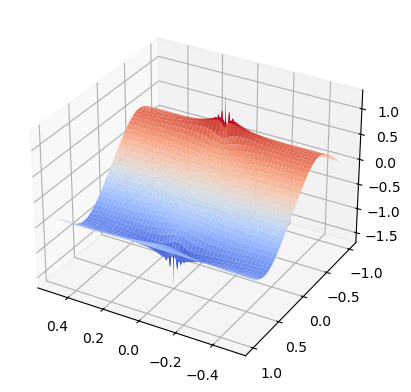

In [50]:
def u_y (x, loc1, loc2, y, b, v):
    factor1 = -b/(2*np.pi)
    term11 = ((1-2*v)/(4*(1-v)))*np.log((x-loc1)**2+y**2)
    term12 = ((x-loc1)**2-y**2)/(4*(1-v)*((x-loc1)**2+y**2))
    factor2 = b/(2*np.pi)
    term21 = ((1-2*v)/(4*(1-v)))*np.log((x-loc2)**2+y**2)
    term22 = ((x-loc2)**2-y**2)/(4*(1-v)*((x-loc2)**2+y**2))
    return (factor1*(term11+term12))+(factor2*(term21+term22))

def u_y_image(x, y, N):
    image_sum = 0
    for i in range(-N, N+1):
        for j in range(-N, N+1):
            R = [i*2, j*1]
            x_update = x-R[0]
            y_update = y-R[1]
            image_sum += u_y(x_update,-0.5, 0.5,y_update,2.8, 0.24)
    return image_sum

def u_y_error(x,y): 
    s_x = u_y_image(-1,0.5,10)-u_y_image(1,0.5,10)
    #s_y = u_y_image(-1,-0.5,10)-u_y_image(-1,0.5,10)
    #s = np.array([s_x, s_y])
    #c_vec = np.array([(x/2)*2, y])
    #err = (s[0]*c_vec[0])+(s[1]*c_vec[1])
    err = s_x*x
    return err


x_values = np.linspace(-1, 1, 1000)
y_values = np.linspace(-0.5, 0.5, 1000)
X, Y = np.meshgrid(x_values, y_values)
Z =   u_y_image(X, Y, 10)-0.17#+(u_y_error(X,Y)/2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(Y, X, Z, cmap='coolwarm', alpha=1)
ax.view_init(elev=30, azim=120)

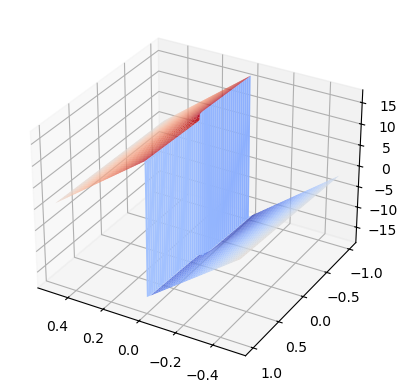

In [26]:
#### Single Edge dislocation displacements

def u_x (x, y, b, v):
    factor1 = b/(2*np.pi)
    theta1 = np.arctan2(y,x)
    term1 = ((x)*y)/(2*(1-v)*((x)**2+y**2))

    return (factor1*(theta1 + term1))

def u_x_image(x, y, N):
    image_sum = 0
    for i in range(-N, N+1):
        for j in range(-N, N+1):
            R = [i*2, j*1]
            x_update = x-R[0]
            y_update = y-R[1]
            image_sum += u_x(x_update,y_update,3.14, 0.24)
    return image_sum

def u_x_error(x,y): 
    s_x = u_x_image(1,-0.5,10)-u_x_image(-1,-0.5,10)
    s_y = u_x_image(1,-0.5,10)-u_x_image(1,0.5,10)
    s = np.array([s_x, s_y])
    c_vec = np.array([(x/2)*2, y])
    err = (s[0]*c_vec[0])+(s[1]*c_vec[1])
    #err = s_y*y
    return err

x_values = np.linspace(-1, 1, 1000)
y_values = np.linspace(-0.5, 0.5, 1000)
X, Y = np.meshgrid(x_values, y_values)
Z =   u_x_image(X, Y, 10)+u_x_error(X,Y)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(Y, X, Z, cmap='coolwarm', alpha=1)
ax.view_init(elev=30, azim=120)

-208.7588566230512


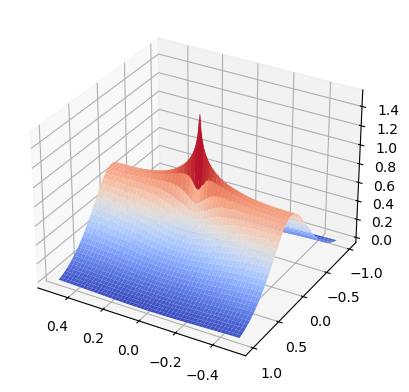

In [25]:
def u_y (x, y, b, v):
    factor1 = -b/(2*np.pi)
    term11 = ((1-2*v)/(4*(1-v)))*np.log((x)**2+y**2)
    term12 = ((x)**2-y**2)/(4*(1-v)*((x)**2+y**2))
    
    return (factor1*(term11+term12))

def u_y_image(x, y, N):
    image_sum = 0
    for i in range(-N, N+1):
        for j in range(-N, N+1):
            R = [i*2, j*1]
            x_update = x-R[0]
            y_update = y-R[1]
            image_sum += u_y(x_update,y_update,3.15, 0.24)
    return image_sum

def u_y_error(x,y): 
    s_x = u_y_image(-1,0.5,10)-u_y_image(1,0.5,10)
    s_y = u_y_image(-1,-0.5,10)-u_y_image(-1,0.5,10)
    s = np.array([s_x, s_y])
    c_vec = np.array([(x/2)*2, y])
    err = (s[0]*c_vec[0])+(s[1]*c_vec[1])
    #err = s_x*x
    return err


x_values = np.linspace(-1, 1, 1000)
y_values = np.linspace(-0.5, 0.5, 1000)
X, Y = np.meshgrid(x_values, y_values)
Z =  u_y_image(X, Y, 10)-u_y_image(1,0.5,10)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
print(u_y_image(1,0.5,10))
ax.plot_surface(Y, X, Z, cmap='coolwarm', alpha=1)
ax.view_init(elev=30, azim=120)

In [28]:
u_x_image(1, 0, 10)+u_x_error(1,0)

14.749094488894887

/var/folders/x6/xldpz4l960d09s7d27px1n240000gn/T/ipykernel_3311/973114545.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


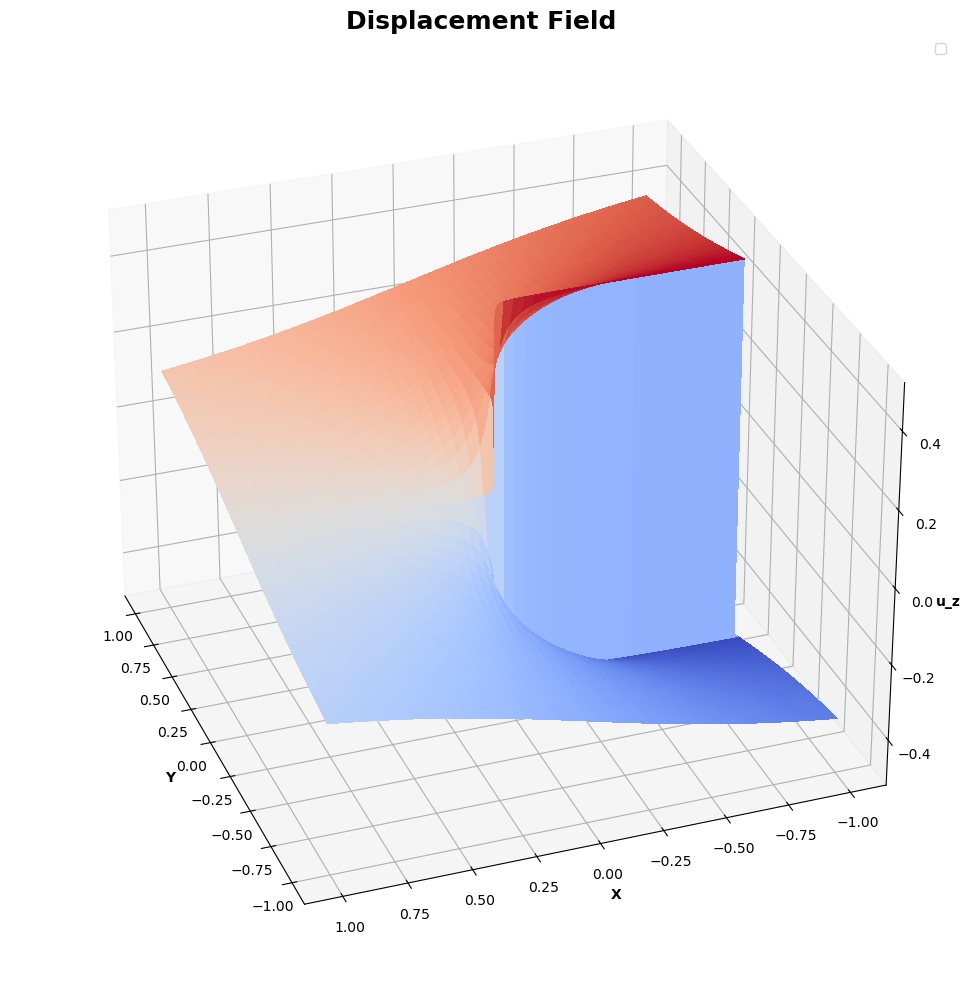

In [43]:
def uz(x, y, b):
    return b * (np.arctan2(y, x) / (2 * np.pi))

# Create a high-resolution grid, excluding the origin to avoid dividing by zero
x_values = np.linspace(-1, 1, 1000)
y_values = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x_values, y_values)
Z = uz(X, Y, 1)

# Optional: Mask the origin to avoid smoothing the discontinuity
Z[np.logical_and(np.abs(X) < 1e-3, np.abs(Y) < 1e-3)] = np.nan

# Plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Surface plot
surf = ax.plot_surface(Y, X, Z, cmap='coolwarm', edgecolor='none', alpha=1, antialiased=False)



# View angle
ax.view_init(elev=30, azim=160)

# Labels and title
ax.set_xlabel('Y', fontsize=10, fontweight='bold')
ax.set_ylabel('X', fontsize=10, fontweight='bold')
ax.set_zlabel('u_z', labelpad=1.5, fontsize=10, fontweight='bold')
ax.set_title(r'Displacement Field', fontsize=18, fontweight='bold')

# Colorbar
#fig.colorbar(surf, shrink=0.5, aspect=10, label=r'$u_z$')

# Legend
ax.legend()

plt.tight_layout()
plt.savefig('uz_singlescrew.png',dpi=600)
plt.show()

